### Exploratory Data Analysis on Air Quality Dataset

| Column Name | Data Type | Description | Units |
| -------- | ------- | -------- | ------- |
| Date | Datetime | Date of Monitoring | ------- |
| Time | Datetime | Time of Monitoring| ------- |
| CO(GT) | Integer | True hourly averaged concentration CO in mg/$m^{3}$ (reference analyzer)  |  mg/$m^{3}$|
| PT08.S1(CO) | Categorical | hourly averaged sensor response (nominally CO targeted) | ------- |
| NMHC(GT) | Integer | True hourly averaged overall Non Metanic HydroCarbons concentration in &micro;g/$m^{3}$ (reference analyzer) | &micro;g/$m^{3}$	 |
| C6H6(GT) | Continuous | True hourly averaged Benzene concentration in &micro;g/m^3 (reference analyzer) | ------- |
| PT08.S2(NMHC) | Categorical | hourly averaged sensor response (nominally NMHC targeted) | ------- |
| NOx(GT)   | Integer | True hourly averaged NOx concentration in ppb (reference analyzer) | ppb |
| PT08.S3(NOx)   | Categorical | hourly averaged sensor response (nominally NOx targeted) | ------- |
| NO2(GT)   | Integer | True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) | &micro;g/$m^{3}$ |
| PT08.S4(NO2)   | Categorical | hourly averaged sensor response (nominally NO2 targeted) | ------- |
| PT08.S5(O3)   | Categorical | hourly averaged sensor response (nominally O3 targeted) | ------- |
| T   | Continuous | Temperature | &deg;C |
| RH  | Continuous | Relative Humidity | % |
| AH   | Continuous | Absolute Humidity | ------- |


In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/AirQualityUCI.csv',sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [3]:
# Remove the categorical columns and some unnecessary columns
df = df.drop(['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)' \
    ,'Unnamed: 15','Unnamed: 16'], axis = 1)
df.shape

(9471, 10)

In [4]:
# To combine Date and Time column and set to index
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' +df['Time'].str.replace('.',':'),format= '%d/%m/%Y %H:%M:%S')
df = df.set_index('Datetime')

# Remove the Date Time since we already have a new index column, Datetime
df = df.drop(['Date','Time'], axis = 1)

# Separate Categorical and Numerical Data Types
df = pd.concat([df.filter(like='GT'),df[['T','RH','AH']]] ,axis=1)
df.head() 

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH
Datetime,,,,,,,,
2004-03-10 18:00:00,"2,6",150.0,"11,9",166.0,113.0,"13,6","48,9","0,7578"
2004-03-10 19:00:00,2,112.0,"9,4",103.0,92.0,"13,3","47,7","0,7255"
2004-03-10 20:00:00,"2,2",88.0,"9,0",131.0,114.0,"11,9","54,0","0,7502"
2004-03-10 21:00:00,"2,2",80.0,"9,2",172.0,122.0,"11,0","60,0","0,7867"
2004-03-10 22:00:00,"1,6",51.0,"6,5",131.0,116.0,"11,2","59,6","0,7888"


In [5]:
df[['CO(GT)','C6H6(GT)','T','RH','AH']] = df[['CO(GT)','C6H6(GT)','T','RH','AH']].apply\
    (lambda x: x.str.replace(',','.').astype(float))
df.head()

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH
Datetime,,,,,,,,
2004-03-10 18:00:00,2.6,150.0,11.9,166.0,113.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,112.0,9.4,103.0,92.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,88.0,9.0,131.0,114.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,80.0,9.2,172.0,122.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,51.0,6.5,131.0,116.0,11.2,59.6,0.7888


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9471 entries, 2004-03-10 18:00:00 to NaT
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CO(GT)    9357 non-null   float64
 1   NMHC(GT)  9357 non-null   float64
 2   C6H6(GT)  9357 non-null   float64
 3   NOx(GT)   9357 non-null   float64
 4   NO2(GT)   9357 non-null   float64
 5   T         9357 non-null   float64
 6   RH        9357 non-null   float64
 7   AH        9357 non-null   float64
dtypes: float64(8)
memory usage: 665.9 KB


In [7]:
# Observe null (NaN) values
df.isna().sum()

CO(GT)      114
NMHC(GT)    114
C6H6(GT)    114
NOx(GT)     114
NO2(GT)     114
T           114
RH          114
AH          114
dtype: int64

In this dataset, there are 114 values that are either zero or negative values ( there are *-200 values* when I checked the raw data). So, we need to manipulate those negative values to ensure a good correlation analysis.

In [8]:
# Handling Null Values
for col in df.columns: 
    df[col] = df[col].replace(-200,np.nan)
    print(col,':',df[col].isna().sum()/len(df)) 
    if df[col][:int(len(df)*0.8)].isna().sum()/int(len(df)*0.8) > 0.5: 
        df.drop(col, axis=1, inplace=True)
    else:
        df[col]: df[col].interpolate(method='linear',limit_direction='both')

CO(GT) : 0.18973709217611656
NMHC(GT) : 0.9034948791046352
C6H6(GT) : 0.05068102629078239
NOx(GT) : 0.18509133143279485
NO2(GT) : 0.18540808784711224
T : 0.05068102629078239
RH : 0.05068102629078239
AH : 0.05068102629078239


NMHC(GT) column was dropped based on the interpolation since it has a large volumes of outlier that can affect the model

<Axes: >

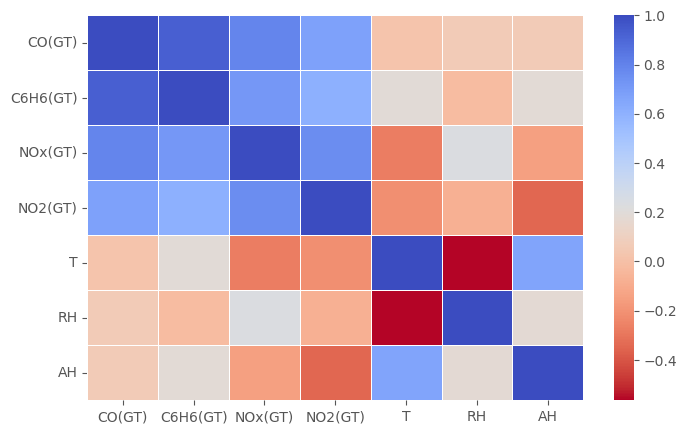

In [12]:
corr_mat = df.dropna().corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_mat,cmap="coolwarm_r",fmt=".2f", linewidths=.5)

Since NO2(GT),NOx(GT), T,and RH are observed to have some relative correlations, we can perform some feature engineering among those parameters. Let's provide NO2/NOx ratio and the *dew point* 
to form a new variable between T and RH using the formula:

$T_d = T-\frac{{100 - RH}}{5}$

In [28]:
#Function to create new features replacing some of the original ones
def create_features(df):
    feat_df= df.copy()
    # NO2/NOx ratio
    feat_df['CO/C6H6(GT)'] = feat_df['CO(GT)']/feat_df['C6H6(GT)']
    # NO2/NOx ratio
    feat_df['NO2/NOx(GT)'] = feat_df['NO2(GT)']/feat_df['NOx(GT)']
    # Dew Point
    feat_df['Dew_Point'] = abs(feat_df['T'] - (100 - feat_df['RH']) / 5)
    # Remove AH and other columns
    feat_df = feat_df.drop(['AH','T','RH','NO2(GT)','NOx(GT)','C6H6(GT)','CO(GT)'],axis=1)
    return feat_df

df2 = create_features(df)

<Axes: >

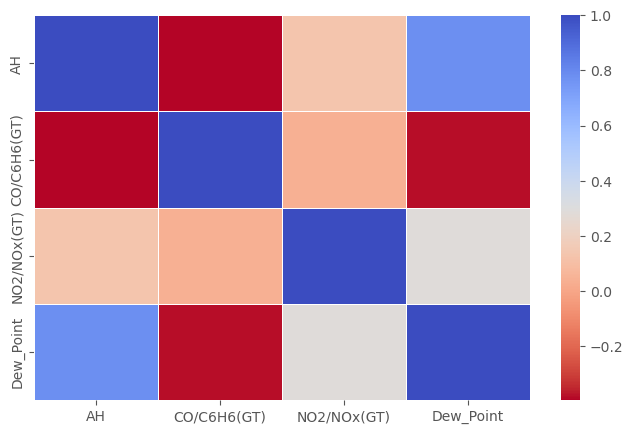

In [29]:
corr_mat = df2.corr().copy()
plt.figure(figsize=(8,5))
sns.heatmap(corr_mat,cmap="coolwarm_r",fmt=".2f", linewidths=.5)

Based on this observation that Dew_Point is highly correlated with C6H6(GT) and then the two new ratio features which are NO2/NOx(GT) and NMHC/CO(GT) are highly correlated variables. We should not combine any of those correlations in training a model. It would result to multicollinearity issue or overfitting of the model.

In [ ]:
feat_df_new = feat_df_new.drop('NMHC/CO(GT)',axis=1).copy()

In [ ]:
ax = feat_df_new.plot(style='.',figsize=(15,5),color=[color_pal[0],color_pal[1],color_pal[2]])
ax.legend(labelcolor='linecolor',loc='center left')
plt.show()

In [ ]:
filter_df = feat_df_new[(feat_df_new['NO2/NOx(GT)'] >= 0) & (feat_df_new['C6H6(GT)'] >= 0) & (feat_df_new['Dew_Point'] >= 0)]
filter_df.shape

In [ ]:
ax = filter_df.plot(style='.',figsize=(15,5),color=[color_pal[0],color_pal[1],color_pal[2]])
ax.legend(labelcolor='linecolor',loc='center left')
plt.show()

In [ ]:
filter_df.to_csv('data/clean_data_AirQualityUCI.csv')